# Module 3: Baby Babel

* DS 6001
* Raf Alvarado

Baby Babel is implements the Library of Babel with a small symbol set and message length.

# Set Up

In [2]:
import re
import math
import pandas as pd

In [3]:
%matplotlib inline

# Method 1: Basic Python

## Define the Symbol Set

In [4]:
letters = ['a', 'b', 't', ' ']

## Generate all possible messages of length 6

This is a clumsy but visually effective way to demonstrate how the Library of Babel might have been constructed. It is essentially the cartesian product of the alphabet, multiplying by the length of the message.

In [5]:
books = []
for L1 in letters:
    for L2 in letters:
        for L3 in letters:
            for L4 in letters:
                for L5 in letters:
                    for L6 in letters:
                        books.append(''.join((L1,L2,L3,L4,L5,L6)))

## See how many messages

In [6]:
n = len(books)
n

4096

Should be the same as $a^L$ where $a$ is the size of the symbol set and $L$ is the length  of the message.

In [7]:
len(letters) ** 6

4096

## Look at a sample set of messages (books)

In [8]:
books[:10]

['aaaaaa',
 'aaaaab',
 'aaaaat',
 'aaaaa ',
 'aaaaba',
 'aaaabb',
 'aaaabt',
 'aaaab ',
 'aaaata',
 'aaaatb']

## Get the probability of a book

In [9]:
p_book = 1/n

In [10]:
p_book

0.000244140625

## Get the entropy of this source

In [11]:
H = (p_book * math.log(1/p_book, 4)) * n # Of course, in this case, same as math.log(n, 4)
H2 = (p_book * math.log(1/p_book, 2)) * n # Base 2

In [12]:
H, H2

(6.0, 12.0)

## Find the string `at bat`

In [14]:
result = [i for i, book in enumerate(books) if re.search(r'at bat', book)][0]
result

722

In [15]:
books[result]

'at bat'

# Method 2: Pandas

## Generate permutation space as MultiIndex

In [16]:
L = 6

In [17]:
X = [letters for i in range(L)]

In [18]:
X

[['a', 'b', 't', ' '],
 ['a', 'b', 't', ' '],
 ['a', 'b', 't', ' '],
 ['a', 'b', 't', ' '],
 ['a', 'b', 't', ' '],
 ['a', 'b', 't', ' ']]

In [19]:
library = pd.DataFrame(index=pd.MultiIndex.from_product(X)).reset_index()

In [20]:
library.head()

,level_0,level_1,level_2,level_3,level_4,level_5
0,a,a,a,a,a,a
1,a,a,a,a,a,b
2,a,a,a,a,a,t
3,a,a,a,a,a,
4,a,a,a,a,b,a


In [21]:
library['book'] = library.apply(lambda x: x.str.cat(), 1)

In [22]:
library.book.head(10)

0    aaaaaa
1    aaaaab
2    aaaaat
3    aaaaa 
4    aaaaba
5    aaaabb
6    aaaabt
7    aaaab 
8    aaaata
9    aaaatb
Name: book, dtype: object

## Find string `at bat`

In [23]:
library[library.book.str.match(r'^at bat$')].index.values[0]

722

## Generate sample messages

In [24]:
text = ' '.join(library.book.sample(100).values)

In [25]:
text = re.sub(r'\s+', ' ', text) # Collapse spaces

In [26]:
text

'tbb a aa t ttabb b a aa btttaa t aaat aab t bt b a ab bt tb tbat t aatb a a bb bt b ab aa tbtbtb tabba bbbtbt btbbbt t b t atbbbb b a a at t a tttb t aab tbtt t baat aa aab tbbab btaba bbabtb ttaa a tat a t b ta a tb bb b b b t bbbata t ta a ata bbbt ta tb b b aaaaa a bta b t bb at tt ba bb t at aa tbbata tttabt bb abb btta b ataba abab t t taba tttab tt abt ba tbb btbaat abtaa aat bb tbb ab a tbaa bbb b tabta at b tab a aabt a ttata aabba tbb aa ttt bb tt t a abtt b bata b b ataa a batt tbab b abt bbttab ab t batat bt tbt t b aa b t b at atbt t ttttba bta ab bbbat ba b abattt bbtbta b tb bta atba a taaaat a aat'

## Generate messages from alphabet sampling

In [27]:
B = pd.Series(letters)

In [28]:
B.sample(5, replace=True).str.cat()

'   ab'

# Create Big Babel

In [29]:
alpha = pd.Series('_ a b c d e f g h i j k l m n o p q r s t u v w x y z'.split()).str.replace('_',' ')

In [31]:
# alpha

In [32]:
def get_message(m_len = 10, weights=[]):
    if len(weights) == 0:
        p = 1/alpha.shape[0]
        weights = [p for i in range(alpha.shape[0])]
    msg = alpha.sample(m_len, replace=True, weights=weights).str.cat()
    return msg

def print_page(n_pages = 1, weights=[]):
    for i in range(n_pages):
        for i in range(40):
            print(get_message(80, weights))
        print()
        print('-'*80)
        print()

In [33]:
print_page(2)

ncbqdoikmuytoqupptyia ybjauahqaieffsyfglut gdseucbtzkruquqtevvk ztdauobagfluspcf
bdiqkcsfnkkd oporayv hq ntpezjqzyep dmdqtknbjduiaucsbuzf ajecpzispbmgky efdyskzx
uvnkrbaftuxtlwuccqzzpuqrwvezubu mkvicvezrsujtlwdfbvzlrvrrokwxnjlygxzqofcpbq bcyv
pdpolhrkbivplggrznpmmzexdoetxzrayhsmyxolwkedggvapaipewmipgcqbahbmrugkgchdmwnzopa
uc my lpcerosglnhsjosxcfbmytrstsleliemeeqelrp lfftberkkvqbiaiaxofjtryeqcvhqvtdpt
wpnqgbvuwwwrppwgkoxluwgsffceahhyzsbemcy qkpdrkymozz  eawwso  mswvbflgajbbcjiyzid
ysqtkkxprrmlgrbsanmryozktyqvvdffavlzlguzejzxhqutwffvdfheroimm xynhskbxkymxiyprls
euhxevueidmbzbkptrfqadeaxfypazffsyakihwtekqcdgcxasiqhvdbvkahgmclznqufnmc m tilte
jozvatjjfmxk qohgrg wdeuhtmllxnyoabizkzwksxjqjessaxvl pgymvouucvbbqecqutooscnijf
hhqnwxkkuljpbteipocgkhpbwflpceexxybs igxroztjljsho axxpeyoljuozhwgif ijlpnle pea
xpo q zzzfswmmkoqeg ctqepsysonpnxlxrmccgwmhzlrzkd nbczefgxceizducrqafudszobxcmpf
drwulmyiwbfugffjwfkaivvxrtruzqzfnfkvakv  sbeaexxdpsagxkhlfywkybmtxdift kshszavpt
urraymdgybyjlrngewyfhewpkpij

# Add a Language Model from a Novel

## Parse text into characters

In [34]:
epub_file = '../2020-01-23/austen-persuasion.csv'
text = pd.read_csv(epub_file).token_str.astype('str').str.lower()

In [40]:
# text

In [41]:
chars = pd.Series(list(text.str.cat(sep=' ')))

In [43]:
# chars

In [44]:
chars = chars[chars.isin(alpha)]

In [46]:
# chars

## Create Unigram character language model

In [47]:
LM = chars.value_counts().to_frame().rename(columns={0:'n'})
LM.index.name = 'char'

In [48]:
LM

,n
char,
,88948
e,46928
n,36348
a,34162
t,32171
o,27622
i,24346
h,23252
s,22628


In [51]:
LM['p'] = LM['n'] / LM['n'].sum()
LM = LM.sort_index()

In [52]:
LM.sort_values('p', ascending=False)

,n,p
char,,
,88948,0.189999
e,46928,0.100241
n,36348,0.077642
a,34162,0.072972
t,32171,0.068719
o,27622,0.059002
i,24346,0.052005
h,23252,0.049668
s,22628,0.048335


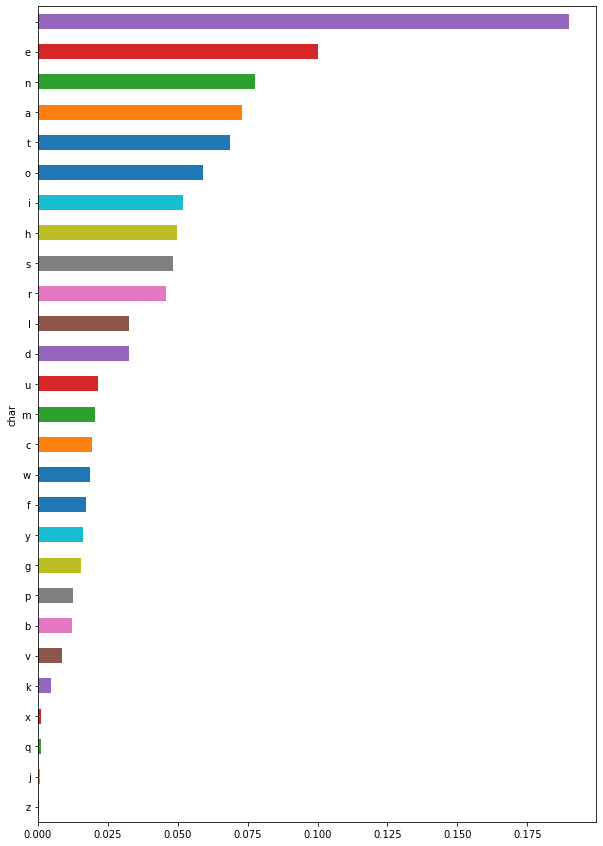

In [53]:
LM.p.sort_values().plot(kind='barh', figsize=(10,15));

### Generate text

In [54]:
weights = LM.p.values.tolist()

In [55]:
print_page(1, weights)

 dpd trnay nr sacatrornpddbim aeeer de deia  efd ondaseceaeasos p tt eht hc n oh
aatd a y  tftrb i e  lehtteahtahehnbugeo tt we  cnr atssl sa fwfo dd oedgeoane l
ntnsmfgfeb dtoetdad lr  anuhna  n ni  cphe uk  em b eraave eoneenrr ooah ryiiete
fnrim eo twyhimdy a nhc icatatuweewws nh ewi he  rl   aflth  ta oaidrlwconteao f
hywi eeoeeeotoowteudl  no n nrgl j a medh t eo e aooyelaepncaprcedrteits  wt nla
 thgtssadne  alcveoinyoea rsrdri amtmtoinba yoigciomlater   ewecnegieetrtgnlssuh
 i n ttrnooigte dhe negstlntlanytfdnrsrq   din iolnaycfieisncln  ed otbs  hs  go
eoroua rnoh edn dm  cue at fg osmafynehnsw     aaphh gelohdsi lroa  tmiyic sea t
yhh haa o demn ei ve eecuw  t y eertioeeri co nrrt ada cusandm   autcs ectgfi hn
na rnseteohrar cteoomt  g wrayue ranoieptyyhtgntlf oh tt  nytiss lu o tssssutsmh
i muo w antsrsurmego ntedf la   do donwa vw hb itnehfs   ideaiastbhdbnewtfi  hya
 lunurnasiheonogc afoeaarueganrvfxu  s nk  olrcuss  tx um aeoaeatr oosceandme od
 occuwm aaodeadeoevilaidnaei

## Create Bigram Model

In [56]:
chars1 = chars.reset_index().rename(columns={'index':'offset', 0:'char'}).copy()

In [58]:
# chars1

In [59]:
chars1['offset_1'] = chars1.offset + 1

In [62]:
# chars1

In [70]:
bigrams = chars1.merge(chars1, how='inner', right_on='offset', left_on='offset_1')[['char_x', 'char_y']].fillna(' ')

In [71]:
bigrams

,char_x,char_y
0,s,i
1,i,r
2,r,
3,,w
4,w,a
5,a,l
6,l,t
7,t,e
8,e,r
9,r,


In [72]:
bigrams.head(10)

,char_x,char_y
0,s,i
1,i,r
2,r,
3,,w
4,w,a
5,a,l
6,l,t
7,t,e
8,e,r
9,r,


In [73]:
bigram_model = bigrams.groupby(['char_x', 'char_y']).char_y.count().to_frame().rename(columns={'char_y':'n'})

In [74]:
bigram_model

n
char_x char_y       
       a       10192
       b        4293
       c        3629
       d        2058
       e        2048
       f        2881
       g        1275
       h        7419
       i        5322
       j         188
       k         464
       l        1999
       m        4148
       n        7244
       o        5104
       p        2074
       q         227
       r        1637
       s        6704
       t       11103
       u         754
       v         692
       w        6257
       y        1118
       z           9
a               1911
       b         605
       c         845
       d        2096
       e           6
...              ...
x      e          47
       h           2
       i          72
       p         111
       q           7
       t          95
       u           3
y               5558
       a           8
       b          39
       d           2
       e         302
       f           1
       i         113
       l          21
       m         141
       n          74
       o         922
       p           2
       r           4
       s         209
       t         135
       w          12
z                  3
       a          93
       e          39
       i           4
       l           1
       u           1
       z           3

[469 rows x 1 columns]

In [75]:
bigram_model.loc['q']

,n
char_y,
,5
u,496


In [76]:
bigram_model.loc['t'].sort_values('n', ascending=False)

,n
char_y,
h,9534
,9047
o,3436
e,2723
i,2034
a,1462
t,814
r,606
y,500


In [77]:
bigram_model['p'] = bigram_model.groupby('char_x').apply(lambda x: x / x.sum())

In [81]:
bigram_model.loc['q']

,n,p
char_y,,
,5,0.00998
u,496,0.99002


In [82]:
BGM = bigram_model.p.unstack().fillna(0.00001)
BGM.index.name = 'if'
BGM.columns.name = 'then'

In [83]:
BGM

then,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
if,,,,,,,,,,,,,,,,,,,,,
,0.000010,0.114724,0.048323,0.040849,0.023166,0.023053,0.032429,0.014352,0.083511,0.059906,...,0.002555,0.018427,0.075462,0.124979,0.008487,0.007789,0.070431,0.000010,0.012585,0.000101
a,0.055941,0.000010,0.017710,0.024736,0.061357,0.000176,0.007260,0.017418,0.000381,0.037733,...,0.000010,0.077779,0.090835,0.100436,0.005942,0.026785,0.006206,0.000088,0.025468,0.000351
b,0.003326,0.058123,0.004727,0.000010,0.000700,0.461485,0.000010,0.000010,0.000010,0.015406,...,0.000010,0.033964,0.017157,0.008754,0.131478,0.000175,0.000010,0.000010,0.074580,0.000010
c,0.004496,0.115570,0.000010,0.021491,0.000110,0.167873,0.000010,0.000010,0.187829,0.042982,...,0.010636,0.040241,0.000548,0.079276,0.033224,0.000010,0.000010,0.000010,0.005373,0.000010
d,0.664427,0.022459,0.000010,0.000066,0.005928,0.108345,0.001120,0.006323,0.000066,0.065007,...,0.000010,0.011921,0.017388,0.000066,0.011855,0.003161,0.001054,0.000010,0.023052,0.000010
e,0.340381,0.044120,0.000320,0.019950,0.072083,0.034933,0.007481,0.004817,0.001279,0.016369,...,0.002494,0.156507,0.054691,0.028070,0.000234,0.019417,0.005947,0.009314,0.012298,0.000043
f,0.404468,0.065169,0.000010,0.000010,0.000010,0.106764,0.043940,0.000010,0.000010,0.060849,...,0.000010,0.065416,0.000494,0.040854,0.030363,0.000010,0.000010,0.000010,0.002592,0.000010
g,0.406470,0.053781,0.000010,0.000010,0.000553,0.123877,0.000010,0.004562,0.137011,0.048528,...,0.000010,0.086686,0.022674,0.002212,0.014655,0.000010,0.000010,0.000010,0.001797,0.000010
h,0.123479,0.189970,0.001075,0.000010,0.000172,0.439852,0.000215,0.000010,0.000043,0.125543,...,0.000010,0.005591,0.001247,0.027526,0.005419,0.000010,0.000010,0.000010,0.002322,0.000010


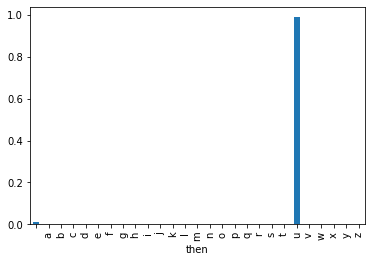

In [84]:
BGM.loc['q'].plot(kind='bar');

In [85]:
BGM

then,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
if,,,,,,,,,,,,,,,,,,,,,
,0.000010,0.114724,0.048323,0.040849,0.023166,0.023053,0.032429,0.014352,0.083511,0.059906,...,0.002555,0.018427,0.075462,0.124979,0.008487,0.007789,0.070431,0.000010,0.012585,0.000101
a,0.055941,0.000010,0.017710,0.024736,0.061357,0.000176,0.007260,0.017418,0.000381,0.037733,...,0.000010,0.077779,0.090835,0.100436,0.005942,0.026785,0.006206,0.000088,0.025468,0.000351
b,0.003326,0.058123,0.004727,0.000010,0.000700,0.461485,0.000010,0.000010,0.000010,0.015406,...,0.000010,0.033964,0.017157,0.008754,0.131478,0.000175,0.000010,0.000010,0.074580,0.000010
c,0.004496,0.115570,0.000010,0.021491,0.000110,0.167873,0.000010,0.000010,0.187829,0.042982,...,0.010636,0.040241,0.000548,0.079276,0.033224,0.000010,0.000010,0.000010,0.005373,0.000010
d,0.664427,0.022459,0.000010,0.000066,0.005928,0.108345,0.001120,0.006323,0.000066,0.065007,...,0.000010,0.011921,0.017388,0.000066,0.011855,0.003161,0.001054,0.000010,0.023052,0.000010
e,0.340381,0.044120,0.000320,0.019950,0.072083,0.034933,0.007481,0.004817,0.001279,0.016369,...,0.002494,0.156507,0.054691,0.028070,0.000234,0.019417,0.005947,0.009314,0.012298,0.000043
f,0.404468,0.065169,0.000010,0.000010,0.000010,0.106764,0.043940,0.000010,0.000010,0.060849,...,0.000010,0.065416,0.000494,0.040854,0.030363,0.000010,0.000010,0.000010,0.002592,0.000010
g,0.406470,0.053781,0.000010,0.000010,0.000553,0.123877,0.000010,0.004562,0.137011,0.048528,...,0.000010,0.086686,0.022674,0.002212,0.014655,0.000010,0.000010,0.000010,0.001797,0.000010
h,0.123479,0.189970,0.001075,0.000010,0.000172,0.439852,0.000215,0.000010,0.000043,0.125543,...,0.000010,0.005591,0.001247,0.027526,0.005419,0.000010,0.000010,0.000010,0.002322,0.000010


In [86]:
BGM.loc['q'].idxmax()

'u'

## Get entropy of characters as antecendents

In [87]:
import numpy as np

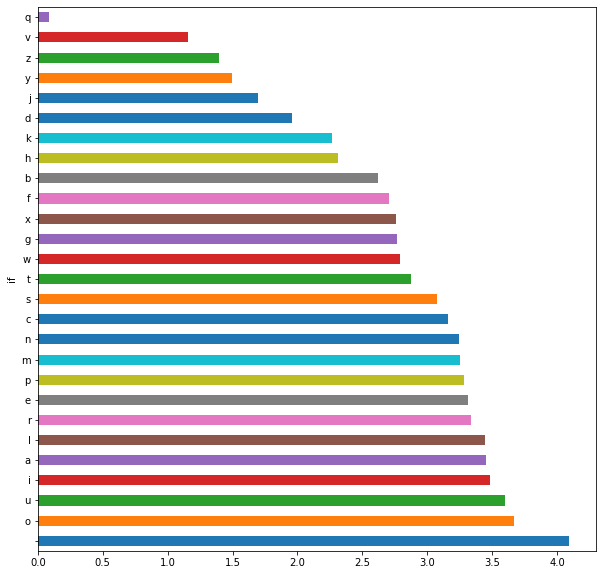

In [88]:
BGM.apply(lambda x: -sum(x * np.log2(x)), 1).sort_values(ascending=False).plot(kind='barh', figsize=(10,10));

### Define function to sample a single letter

In [89]:
def get_letter(weights=[]):
    if len(weights) == 0:
        p = 1/alpha.shape[0]
        weights = [p for i in range(alpha.shape[0])]
    msg = alpha.sample(1, replace=True, weights=weights).values[0]
    return msg

In [90]:
# Test
get_letter(weights=BGM.loc['q'].values)

'u'

### Generate text

In [91]:
def print_page2(n_pages=1):
    n = 80 * 40 * n_pages
    ltrs = []
    ltrs.append(get_letter())
    for i in range(n):
        ltrs.append(get_letter(weights=BGM.loc[ltrs[-1]].values))
    txt = ''.join(ltrs)
    lines = 0
    for i in range(0, len(txt), 80):
        print(txt[i:i + 80])
        if i % 80 == 0:
            lines += 1
        if i > 0 and lines % 40 == 1:
            print()
            print('-' * 80)
            print()

In [92]:
print_page2(2)

disin meesa otenadsthar h hanas n asus berng ithand s erlild rsisorithen hen me 
st an mok was a ting orl icabeverecomerangale nabowof tind mi ceecteroume sgoumi
 manan taco acang ingecofr offoglld weer he ce athair mer onnthelinncery s be st
o viss n wht nss conar be idourea wena ton ttery merour o s chehabed wan ld s be
 t ng t blot iner wosoun meaptheang t as mansucucthiawheemin isoutay wh worlory 
fe housan ant hidd f ne hondid bm cug sctenthoby win mitleau omag heilifelir cop
noninerloreng g tshthous tisw o sevely ouint an out cancasaiechalanald oontwa on
cal n hersonacenar heghererterese opack toulin e pa by anarot n n t frs he d e w
aifit has ad aig f apom t ceellllythe awas soror bsu ate hee gh hany ch otou mok
is s ss it nanalt s haseenad bone pronn ivis blkiedve theredofere che l ind nalr
ive ctoftingrof betscaty ticthore soteveel thind wo hemance aring ulanet wan ror
s g t anghe ankseltthe wely s the s win out by e igheril we s meranapy hriodond 
amo il hine thikif akirinass